<a href="https://colab.research.google.com/github/brandon-mason/cs4337-collabs/blob/main/HW/LightRoomCC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment: Enhancing Image Processing with OpenCV using ImageAdjuster**

---

#### **Overview:**
In this assignment, you will be provided with an existing image processing tool built using OpenCV and Panel. The primary tool, `ImageAdjuster`, is designed to allow real-time image adjustments for **Light**, **Color**, and **Effects**. While most of the code is already implemented, the **Color** and **Effects** functions are incomplete.

Your task is to research and implement the missing functions using OpenCV, fill out the appropriate docstrings and type hints, and reflect on the solution through an open-ended question.

---

### **Objective:**
- Implement missing **Color** and **Effects** functions.
- Add docstrings and type hinting throughout the code.
- Reflect on the provided tool, its learning impact, and how you might improve it.

---

### **Setup and Requirements:**

1. **Initial Setup:**
   - You will be provided with a partially completed code for an `ImageAdjuster` class, which uses sliders to adjust properties of an image.
   - The code handles **Light** controls (exposure, contrast, highlights, shadows, whites, blacks), but the **Color** and **Effects** functions are incomplete.
   - Your duty is to fill in the `adjust_temperature()`, `adjust_tint()`, `adjust_vibrance()`, `adjust_saturation()`, `adjust_texture()`, `adjust_clarity()`, `adjust_dehaze()`, `apply_vignette()`, and `add_grain()` functions.

2. **Docstrings and Type Hinting:**
   - You must provide **clear and concise docstrings** for all functions.
   - Add **type hints** to function signatures to specify input and output types.

3. **Function Descriptions and Tasks:**

#### **Color Adjustments** (Fill in these functions using OpenCV):
   - **`adjust_temperature()`**: Adjust the color temperature by manipulating the blue channel of the image.
   - **`adjust_tint()`**: Adjust the tint by altering the green channel.
   - **`adjust_vibrance()`**: Enhance the vibrance of the image by selectively increasing the intensity of less saturated areas.
   - **`adjust_saturation()`**: Modify the overall saturation by working in the HSV color space to change the saturation channel.

#### **Effects Adjustments** (Fill in these functions using OpenCV):
   - **`adjust_texture()`**: Implement a method to enhance textures using unsharp masking. Research how blurring and subtracting the blurred image from the original enhances texture.
   - **`adjust_clarity()`**: Boost midtone contrast to enhance local details using local contrast enhancement.
   - **`adjust_dehaze()`**: Reduce haze by manipulating the brightness of darker areas.
   - **`apply_vignette()`**: Apply a vignette effect by creating a radial mask that darkens the edges more than the center.
   - **`add_grain()`**: Add noise to the image to simulate film grain. Use random Gaussian noise and add it to the image to create this effect.

---

### **Instructions:**

1. **Docstrings and Type Hints (25% of the grade)**:
   - Every function in the `ImageAdjuster` class should include a docstring explaining what the function does, what parameters it takes, and what it returns.
   - Add **type hints** wherever needed. This includes specifying the input types (e.g., `image: np.ndarray`) and the return types (e.g., `-> None`).

2. **Task Completion (65% of the grade)**:
   - **Implement the Color and Effects functions** using OpenCV.
   - Ensure the sliders in the Panel UI correctly adjust the image properties.
   - Each function should work independently and integrate with the overall image adjustment pipeline.

3. **Open-Ended Reflection (10% of the grade)**:
   - Answer the following questions in a separate markdown cell:
     1. **Engagement**: Did this problem engage you, and did it increase your desire to learn more about image processing?
     2. **Limitations**: What are the limitations of the current approach in terms of performance, usability, or accuracy?
     3. **Improvements**: How would you improve the current tool to make it more efficient, user-friendly, or capable?

4. **General Tips**:
   - **Restart Session**: This code might be a bit finicky, meaning that when you make changes, you may need to restart your runtime/session to see the effects. If the tool doesn't behave as expected, first ensure that all the requirements are met, and then restart the session.
   - **Use OpenCV Documentation**: Research OpenCV functions, such as `cv2.GaussianBlur`, `cv2.cvtColor`, and other tools that can help you implement the required image effects.

---

### **Submission Instructions:**
1. You are required to work on Google Colab for this assignment.
2. Once you complete the assignment, **download the `.ipynb` file from Colab** and **upload it to Canvas**.
3. **Share the link** to your Google Colab notebook privately with **keshav.s.bhandari@gmail.com**. Make sure the file is accessible only to the instructor.
4. **Submit the Google Colab link** in the comment section of your submission on the designated platform.
5. You may submit the assignment multiple times before the deadline, but **once it is graded, resubmission will not be allowed**.

---

### **Grading Rubric:**

1. **Docstrings and Type Hinting (25%)**:
   - Each function should have proper docstrings.
   - Type hints should be provided for function parameters and return types.

2. **Task Completion (65%)**:
   - **Color Adjustments (Temperature, Tint, Vibrance, Saturation)**: Ensure that these functions modify the image properly when sliders are adjusted.
   - **Effects Adjustments (Texture, Clarity, Dehaze, Vignette, Grain)**: Implement these using OpenCV and ensure they are applied correctly to the image.

3. **Open-Ended Reflection (10%)**:
   - Thoughtful answers to the open-ended questions about engagement, limitations, and possible improvements.

---

### **Notes on OpenCV Functions**:
- **`cv2.GaussianBlur(src, ksize, sigmaX)`**: Blurs the image using a Gaussian kernel. Useful for creating smoothing effects.
- **`cv2.cvtColor(src, code)`**: Converts the image between different color spaces (e.g., RGB to HSV). Use this when you need to adjust saturation, vibrance, or apply dehazing.
- **NumPy functions** (`np.clip`, `np.random.normal`): You may need to work directly with NumPy arrays to manipulate pixel values, apply grain, or perform image arithmetic.

---

## Guide01 - Understanding Effect Controls

Sure! Let's dive deeper into the **explanation of each effect** in a more intuitive and detailed way. I'll explain how each effect works, what OpenCV functions can be used, how those functions operate, and how you might apply them to a small example like an 8x8 image with 3 color channels (RGB). We'll also cover the meaning of key parameters and how they affect the result.

### 1. **Texture Enhancement** (Unsharp Masking)
   - **Purpose**: This effect is used to enhance fine details in the image. It sharpens the image by emphasizing the differences between the original image and a blurred version of itself.
   - **How It Works**: We blur the image, subtract the blurred version from the original image, and then add the result back to the original. This highlights the details in the image.
   - **OpenCV Function**: `cv2.GaussianBlur()` and simple arithmetic.
     - **Function**: `cv2.GaussianBlur(src, ksize, sigmaX)`
       - `src`: The input image (e.g., our 8x8 image).
       - `ksize`: Size of the Gaussian kernel (e.g., `(9,9)`).
       - `sigmaX`: Standard deviation in the X direction (e.g., `2`).
     - **Effect**: A larger `ksize` or `sigmaX` means more blurring, which reduces details. Smaller values retain more texture.
   - **Toy Example**: Let's assume you have an 8x8 image with RGB channels. Blurring the image with `cv2.GaussianBlur` smooths the image, so when we subtract this blurred image from the original, it emphasizes edges and textures.

### 2. **Clarity Enhancement** (Local Contrast)
   - **Purpose**: Enhances local contrast by boosting midtone contrasts without significantly altering highlights or shadows.
   - **How It Works**: A small Gaussian blur is applied to the image to soften local contrast, then the blurred image is subtracted from the original and the result is added back to enhance clarity.
   - **OpenCV Function**: `cv2.GaussianBlur()` (for the blur) and simple arithmetic.
     - **Function**: `cv2.GaussianBlur(src, ksize, sigmaX)`
       - `ksize`: A small kernel size, e.g., `(3,3)`, is often used for clarity.
       - `sigmaX`: Small value (e.g., `2.0`).
     - **Effect**: Smaller `ksize` and `sigmaX` enhance clarity by keeping local details sharp. Larger values reduce clarity and increase smoothness.
   - **Toy Example**: On an 8x8 image, you can apply a `(3,3)` blur to reduce clarity, then subtract it from the original image. This subtraction emphasizes the fine local details, making the image look sharper.

### 3. **Dehaze** (Haze Reduction)
   - **Purpose**: Reduces haze or fog in an image, especially in outdoor scenes where atmospheric conditions can dull the image.
   - **How It Works**: Dehazing focuses on increasing contrast and brightness in areas of low intensity (i.e., shadows or darker parts of the image). The haze often reduces contrast, so dehazing boosts these areas.
   - **OpenCV Function**: `cv2.cvtColor()` to convert to HSV color space and adjust the value (brightness) channel.
     - **Function**: `cv2.cvtColor(src, code)`
       - `src`: The input image.
       - `code`: Color conversion code, `cv2.COLOR_RGB2HSV` to convert RGB to HSV.
     - **Effect**: By modifying the `V` (value) channel of the HSV image, dehaze increases brightness in darker parts of the image.
   - **Toy Example**: On an 8x8 image, convert it to HSV using `cv2.cvtColor`. Increase the values in the `V` (brightness) channel to simulate dehazing.

### 4. **Vignette Effect** (Radial Shading)
   - **Purpose**: Darkens the corners of an image, creating a more focused and artistic look. Often used in photography to draw attention to the center of the image.
   - **How It Works**: We create a radial gradient that darkens the corners more than the center, applying this mask over the original image.
   - **OpenCV Function**: Use NumPy to create a vignette mask manually.
     - **Creating the Mask**: Use meshgrid to calculate the distance from the center for each pixel and then create a darkening mask based on that distance.
     - **Effect**: Pixels farther from the center are darkened more, creating a vignette effect.
   - **Toy Example**: In an 8x8 image, you can calculate the distance of each pixel from the center of the image. Pixels farther from the center (corners) will be darker.

### 5. **Grain (Noise Addition)**
   - **Purpose**: Adds film-like grain or noise to the image. It can create a retro or gritty effect, giving the image texture and a nostalgic look.
   - **How It Works**: Add random Gaussian noise to the image to simulate graininess.
   - **OpenCV Function**: NumPy is used to generate noise.
     - **Generating Noise**: `np.random.normal(mean, std_dev, size)` generates random values from a normal distribution.
       - `mean`: The average intensity of the noise (usually 0 for grain).
       - `std_dev`: Standard deviation controls the spread of noise (e.g., `0.1`).
       - `size`: The size of the image (e.g., 8x8x3 for a small image with 3 channels).
     - **Effect**: Higher `std_dev` increases graininess, while lower values make the noise more subtle.
   - **Toy Example**: On an 8x8 image, generate random noise using `np.random.normal(0, 0.1, (8,8,3))` and add it to the image to create a grainy effect.

### **Putting It Together**:
Imagine you have an 8x8 image with 3 color channels (RGB), represented as a NumPy array. Each pixel value in this array ranges from 0 to 1 (if normalized). Here’s how the effects would modify this small image:
- **Texture** would emphasize fine details by sharpening differences between neighboring pixels.
- **Clarity** would boost the contrast of local midtones, making the image appear clearer.
- **Dehaze** would brighten and increase the contrast of darker parts of the image.
- **Vignette** would darken the corners relative to the center.
- **Grain** would introduce random noise, simulating a film-like texture.

## Guide02 - Understanding Color Controls

### 1. **Temperature**:
   - **Intuitive Explanation**: Think of temperature as the "warmth" or "coolness" of the image. A **higher temperature** makes the image feel "warmer" (more yellow/orange), while a **lower temperature** makes the image feel "cooler" (more blue).
   - **What Happens**: This adjustment increases or decreases the **blue** component of the image.
     - **Warm Colors (High Temperature)**: We reduce the blue channel to bring out warmer tones (reds/yellows).
     - **Cool Colors (Low Temperature)**: We increase the blue channel to emphasize cooler tones (blues).
  
### 2. **Tint**:
   - **Intuitive Explanation**: Tint adjusts the balance between **green** and **magenta**.
     - Increasing tint (positive values) adds a **greenish** cast to the image.
     - Decreasing tint (negative values) adds a **magenta** (purple-pink) tone.
   - **What Happens**: Tint works by adjusting the **green** channel.
     - **More Green**: Green tones are increased, making the image appear more natural or vibrant, especially in landscapes.
     - **Less Green (More Magenta)**: The opposite of green is magenta, so lowering the green channel brings out reddish-purple tones.

### 3. **Vibrance**:
   - **Intuitive Explanation**: Vibrance adjusts the **intensity of colors** in a selective manner, mostly affecting the less saturated colors in the image. It enhances color richness without making the already saturated areas look unnatural.
   - **What Happens**: Vibrance adjusts the intensity of the colors based on how "strong" the colors already are.
     - **Higher Vibrance**: Increases the intensity of muted colors while trying to preserve skin tones and areas that are already highly saturated.
     - **Lower Vibrance**: Muted colors get even softer, reducing their impact.
   - **Difference from Saturation**: Unlike saturation, vibrance is **selective** and affects weaker colors more than stronger ones, leading to a more subtle adjustment.

### 4. **Saturation**:
   - **Intuitive Explanation**: Saturation controls the **strength of all colors** in the image, making them more vivid or more muted.
     - Higher saturation makes colors more intense and vivid.
     - Lower saturation brings colors closer to grayscale (black-and-white).
   - **What Happens**: The image is converted to the **HSV color space** (Hue, Saturation, Value), and the saturation channel is adjusted:
     - **Higher Saturation**: Colors become more vivid and intense, pushing them toward their pure form.
     - **Lower Saturation**: Colors become more muted, fading toward grayscale.

**Best of Luck!**

Make sure to complete the assignment, research relevant OpenCV tools, and submit your answers along with thoughtful reflections!

## Initial Setup

In [82]:
# Install gdown
!pip install -q gdown

In [83]:
# Download from google-drive
!gdown --id 1EafCqaBZ8j0wlUj46QMuIRWzdg74X4_S

/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1EafCqaBZ8j0wlUj46QMuIRWzdg74X4_S
To: /content/DSC09896.ARW
100% 53.1M/53.1M [00:00<00:00, 89.0MB/s]


In [84]:
!gdown 1bc1ROjRx_idNOrE5qfmBf4KyG9l9B58C

Downloading...
From: https://drive.google.com/uc?id=1bc1ROjRx_idNOrE5qfmBf4KyG9l9B58C
To: /content/image.jpg
100% 129k/129k [00:00<00:00, 35.6MB/s]


In [85]:
!pip install -q holoviews panel jupyter_bokeh

Future Reference | Requirements

    cv2.__version__ = '4.10.0'
    np.__version__ = '1.26.4'
    param.__version__ = '2.1.1'
    hv.__version__ = '1.18.3'
    pn.__version__ = '1.4.5'
    bokeh.__version__ = '3.4.3'
    jupyter_bokeh.__version__ = '4.0.5'

## TODO !! CODE

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
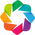

Row(height=374, sizing_mode='stretch_height')
    [0] Column
        [0] Accordion
            [0] Param(ImageAdjuster, parameters=['exposure', 'contrast', ...])
        [1] Accordion
            [0] Param(ImageAdjuster, parameters=['temperature', ...])
        [2] Accordion
            [0] Param(ImageAdjuster, parameters=['texture', 'clarity', ...])
    [1] ParamMethod(method, _pane=HoloViews, defer_load=False)
    [2] Column
        [0] Button(button_type='primary', name='Apply Adjustments')

In [162]:
import cv2
import numpy as np
import param
import holoviews as hv
import panel as pn
from functools import wraps

hv.extension('bokeh')
pn.extension()

class ImageAdjuster(param.Parameterized):
    # Light controls
    exposure = param.Integer(default=0, bounds=(-100, 100), doc="Adjust exposure (brightness)")
    contrast = param.Number(default=1.0, bounds=(0.1, 3.0), doc="Adjust contrast")
    highlights = param.Integer(default=0, bounds=(-100, 100), doc="Adjust highlights")
    shadows = param.Integer(default=0, bounds=(-100, 100), doc="Adjust shadows")
    whites = param.Integer(default=0, bounds=(-100, 100), doc="Adjust whites")
    blacks = param.Integer(default=0, bounds=(-100, 100), doc="Adjust blacks")

    # Color controls
    temperature = param.Integer(default=0, bounds=(-100, 100), doc="Adjust color temperature")
    tint = param.Integer(default=0, bounds=(-100, 100), doc="Adjust color tint")
    vibrance = param.Integer(default=0, bounds=(-100, 100), doc="Adjust vibrance")
    saturation = param.Number(default=1.0, bounds=(0.0, 2.0), doc="Adjust saturation")

    # Effects controls
    texture = param.Number(default=0, bounds=(-100, 100), doc="Adjust texture")
    clarity = param.Number(default=0, bounds=(-100, 100), doc="Adjust clarity")
    dehaze = param.Number(default=0, bounds=(-100, 100), doc="Adjust dehaze level")
    vignette = param.Number(default=0, bounds=(-100, 100), doc="Apply vignette effect")
    grain = param.Number(default=0, bounds=(0, 100), doc="Add grain to the image")

    event_func = param.Parameter(default=None, doc="Holds one of the adjustment function names")

    def __init__(self, image, **params):
        super().__init__(**params)
        self.image = cv2.imread('vibrance-image.jpg')
        if self.image is None:
            raise ValueError("No image provided.")
        self.image_rgb = cv2.cvtColor(self.image, cv2.COLOR_BGR2RGB).astype(np.float32) / 255.0
        self.image_hsv = cv2.cvtColor(self.image_rgb, cv2.COLOR_RGB2HSV)
        self.image_height, self.image_width = self.image.shape[:2]
        self.adjusted_image = self.image_rgb.copy()

    # Custom decorator to automatically set event_func
    def set_event_func(func):
        @wraps(func)
        def wrapper(self, *args, **kwargs):
            self.event_func = func.__name__
            return func(self, *args, **kwargs)
        return wrapper

    @param.depends('event_func', watch=False)
    def render_image(self):
        """Render the image based on the parameter that changed."""
        if self.event_func:
            getattr(self, self.event_func)()  # Perform adjustment
        # Render the adjusted image
        adjusted_image = (self.adjusted_image * 255).astype(np.uint8)
        self.event_func = None
        return hv.RGB(adjusted_image, bounds=(0, 0, 1, 1)).opts(width=self.image_width, height=self.image_height)

    # ALL ADJUSTMENTS DOWN THE LINE

    # Light Adjustments
    @set_event_func
    @param.depends('exposure', watch=True)
    def adjust_exposure(self):
        self.adjusted_image = np.clip(self.image_rgb + self.exposure / 255.0, 0, 1)

    @set_event_func
    @param.depends('contrast', watch=True)
    def adjust_contrast(self):
        self.adjusted_image = np.clip((self.image_rgb - 0.5) * self.contrast + 0.5, 0, 1)

    @set_event_func
    @param.depends('highlights', watch=True)
    def adjust_highlights(self):
        highlight_mask = self.adjusted_image > 0.5
        self.adjusted_image[highlight_mask] = np.clip(self.adjusted_image[highlight_mask] + self.highlights / 255.0, 0, 1)

    @set_event_func
    @param.depends('shadows', watch=True)
    def adjust_shadows(self):
        shadow_mask = self.adjusted_image <= 0.5
        self.adjusted_image[shadow_mask] = np.clip(self.adjusted_image[shadow_mask] - self.shadows / 255.0, 0, 1)

    @set_event_func
    @param.depends('whites', watch=True)
    def adjust_whites(self):
        self.adjusted_image = np.clip(self.image_rgb * (1 + self.whites / 255.0), 0, 1)

    @set_event_func
    @param.depends('blacks', watch=True)
    def adjust_blacks(self):
        self.adjusted_image = np.clip(self.image_rgb - self.blacks / 255.0, 0, 1)

    # Color Adjustments
    @set_event_func
    @param.depends('temperature', watch=True)
    def adjust_temperature(self):
        blue = self.image_rgb[:,:,2]
        self.adjusted_image[:,:,2] = np.clip(blue - self.temperature / 255.0, 0, 1)

    @set_event_func
    @param.depends('tint', watch=True)
    def adjust_tint(self):
        green = self.image_rgb[:,:,1]
        self.adjusted_image[:,:,1] = np.clip(green - self.tint / 255.0, 0, 1)

    @set_event_func
    @param.depends('vibrance', watch=True)
    def adjust_vibrance(self):
        image_hsv = self.image_hsv.copy()
        sat = image_hsv[:,:,1]
        scale = (100 + self.vibrance) / 100
        image_hsv[:,:,1] = np.clip(sat + (1.0 - sat) * (scale - 1.0) * sat, 0.0, 1.0)
        self.adjusted_image = cv2.cvtColor(image_hsv, cv2.COLOR_HSV2RGB)

    @set_event_func
    @param.depends('saturation', watch=True)
    def adjust_saturation(self):
        image_hsv = self.image_hsv.copy()
        sat = self.image_hsv[:,:,1]
        image_hsv[:,:,1] = np.clip(self.saturation * sat, 0.0, 1.0)
        self.adjusted_image = cv2.cvtColor(image_hsv, cv2.COLOR_HSV2RGB)

    # Effects Adjustments
    @set_event_func
    @param.depends('texture', watch=True)
    def adjust_texture(self):
        pass

    @set_event_func
    @param.depends('clarity', watch=True)
    def adjust_clarity(self):
        pass

    @set_event_func
    @param.depends('dehaze', watch=True)
    def adjust_dehaze(self):
        pass

    @set_event_func
    @param.depends('vignette', watch=True)
    def apply_vignette(self):
        pass

    @set_event_func
    @param.depends('grain', watch=True)
    def add_grain(self):
        pass

# Load an image using OpenCV
image = cv2.imread('image.jpg')  # Replace with your image

# Instantiate the class with the image directly
image_adjuster = ImageAdjuster(image=image)

# Create collapsible widgets for Light, Color, and Effects adjustments
light_controls = pn.layout.Accordion(
    ('Light', pn.Param(image_adjuster, parameters=['exposure', 'contrast', 'highlights', 'shadows', 'whites', 'blacks']))
)

color_controls = pn.layout.Accordion(
    ('Color', pn.Param(image_adjuster, parameters=['temperature', 'tint', 'vibrance', 'saturation']))
)

effects_controls = pn.layout.Accordion(
    ('Effects', pn.Param(image_adjuster, parameters=['texture', 'clarity', 'dehaze', 'vignette', 'grain']))
)

apply_button = pn.widgets.Button(name='Apply Adjustments', button_type='primary')

def apply_adjustments():
  return image_adjuster.render_image()

# Create a Panel layout organized with collapsible widgets
layout = pn.Row(
    pn.Column(light_controls, color_controls, effects_controls),
    image_adjuster.render_image,
    pn.Column(apply_button)
)

# Set the height of the layout to match the image height
layout.sizing_mode = 'stretch_height'
layout.height = image_adjuster.image_height

# Display the layout in the notebook
layout


# BONUS

  - Can you add another widget columns on the right side of the image?
  - Within that widget columns, can you add a button called as apply adjustments?
  - Apply adjustments only when the button is clicked.
  - Down the button show all the adjustments currently applied to an image.